## Combining Machine Learning and Optimization 
## With Gurobi and sklearn

## Machine Learning topics 
Touching the elephant here, but ~~not there~~

Supervised Learning
  * Algorithm selection and hyper-parametric optimization
  * KFold assessment vs overfitting
  * Separating training from prediction 

~~Unsupervised Learning~~

~~Time Series Data~~

~~Deep Learning~~

## Optimization topics

  * Exploratory programming to application deployment
  * Coping with the combinatorial explosion
  * Validating optimization with simulation

# All Under the Banner of Python!

## The Soda Promotion Problem

We have the challenge of designing the upcoming promotion campaign for a Soda Company. The intended objective is to bolster sales while at the same time obeying various business constraints.

## The First Challenge

We need to predict impact of different price points on the expected sales for each type of soda.

To do this, we need to train a soda sales predictor from a historical data table.


### Examine historical data 

In [279]:
import pandas
df_hist = pandas.read_excel("soda_sales_historical_data.xlsx")
df_hist[10:]


,Product,Sales,Cost Per Unit,Easter Included,Super Bowl Included,Christmas Included,Other Holiday,4 Wk Avg Temp,4 Wk Avg Humidity,Sales M-1 weeks,Sales M-2 weeks,Sales M-3 weeks,Sales M-4 Weeks,Sales M-5 weeks
10,Alpine Stream,135.7,2.0775,No,No,Yes,No,80.94,69.33,1.9,2.4,2.2,2.0,1.4
11,Bright,3054.8,1.3425,No,No,Yes,No,80.94,69.33,473.4,301.8,188.8,101.4,81.6
12,Crisp Clear,50.3,1.6000,No,No,Yes,No,80.94,69.33,42.2,73.8,69.4,72.8,75.4
13,Popsi Kola,347.9,1.7650,No,No,Yes,No,80.94,69.33,22.9,23.1,22.6,22.1,19.9
14,DC Kola,979.3,1.9250,No,No,Yes,No,80.94,69.33,45.5,56.0,37.7,35.5,21.9
15,Koala Kola,1173.3,2.6725,No,No,Yes,No,80.94,69.33,248.2,344.6,305.3,263.2,290.3
16,AB Root Beer,592.4,3.8625,No,No,Yes,No,80.94,69.33,79.7,74.8,55.8,19.0,18.3
17,Mr. Popper,31.3,2.9750,No,No,Yes,No,80.94,69.33,5.4,7.1,6.4,6.8,7.4
18,11 Down,242.7,1.5300,No,No,Yes,No,81.24,68.78,22.4,10.6,17.0,22.4,13.5
19,Alpine Stream,220.1,1.9100,No,No,Yes,No,81.24,68.78,2.1,1.9,2.4,2.2,2.0


In [280]:
df_hist.shape

(596, 14)

### Convert categorical columns to numeric

In [281]:
from pandas import DataFrame, get_dummies
categorical_columns = ['Product','Easter Included','Super Bowl Included', 
                       'Christmas Included', 'Other Holiday']
df_hist = get_dummies(df_hist, prefix={k:"dmy_%s"%k for k in categorical_columns},
                      columns = list(categorical_columns))
df_hist[:5]


,Sales,Cost Per Unit,4 Wk Avg Temp,4 Wk Avg Humidity,Sales M-1 weeks,Sales M-2 weeks,Sales M-3 weeks,Sales M-4 Weeks,Sales M-5 weeks,dmy_Product_11 Down,...,dmy_Product_Koala Kola,dmy_Product_Mr. Popper,dmy_Product_Popsi Kola,dmy_Easter Included_No,dmy_Easter Included_Yes,dmy_Super Bowl Included_No,dmy_Super Bowl Included_Yes,dmy_Christmas Included_No,dmy_Christmas Included_Yes,dmy_Other Holiday_No
0,51.9,1.6625,80.69,69.19,17.0,22.4,13.5,14.5,28.0,1,...,0,0,0,1,0,1,0,0,1,1
1,55.8,2.2725,80.69,69.19,2.4,2.2,2.0,1.4,0.5,0,...,0,0,0,1,0,1,0,0,1,1
2,3385.6,1.3475,80.69,69.19,301.8,188.8,101.4,81.6,213.8,0,...,0,0,0,1,0,1,0,0,1,1
3,63.5,1.6600,80.69,69.19,73.8,69.4,72.8,75.4,57.4,0,...,0,0,0,1,0,1,0,0,1,1
4,181.1,1.8725,80.69,69.19,23.1,22.6,22.1,19.9,23.2,0,...,0,0,1,1,0,1,0,0,1,1


### Picking the right predictor algorithm is of upmost importance

Hence we examine our choices here in great deal.

In [6]:
# import torch
# from torch.autograd import Variable
# class LinearRegression(torch.nn.Module):
#     def __init__(self, inputSize, outputSize):
#         super(linearRegression, self).__init__()
#         self.linear = torch.nn.Linear(inputSize, outputSize)

#     def forward(self, x):
#         out = self.linear(x)
#         return out

In [282]:
from torch import *
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import BaggingRegressor
# from sklearn import model_selection
# experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
#                             "Big Random Forest", "Random Forest", 
#                             "Bagging"], 
#                "Objects" : [lambda : LinearRegression(), 
#                             lambda : DecisionTreeRegressor(), 
#                             lambda : RandomForestRegressor(n_estimators=100), 
#                             lambda : RandomForestRegressor(), 
#                             lambda : BaggingRegressor()], 
#                "Predictions":[[] for _ in range(5)]}
# actuals = []

experiments = {"Algorithm":["Ordinary Least Squares"], 
               "Objects" : [lambda : LinearRegression()], 
               "Predictions":[[] for _ in range(1)]}
actuals = []



In [283]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 25 columns):
Sales                          596 non-null float64
Cost Per Unit                  596 non-null float64
4 Wk Avg Temp                  596 non-null float64
4 Wk Avg Humidity              596 non-null float64
Sales M-1 weeks                596 non-null float64
Sales M-2 weeks                596 non-null float64
Sales M-3 weeks                596 non-null float64
Sales M-4 Weeks                596 non-null float64
Sales M-5 weeks                596 non-null float64
dmy_Product_11 Down            596 non-null uint8
dmy_Product_AB Root Beer       596 non-null uint8
dmy_Product_Alpine Stream      596 non-null uint8
dmy_Product_Bright             596 non-null uint8
dmy_Product_Crisp Clear        596 non-null uint8
dmy_Product_DC Kola            596 non-null uint8
dmy_Product_Koala Kola         596 non-null uint8
dmy_Product_Mr. Popper         596 non-null uint8
dmy_Product_Popsi Kola     

### Resist the temptation to overfit!
Instead, split the samples into train, test subsections.

In [285]:
# Data Preparation
import torch.utils.data
trainSize = int(0.75 * len(df_hist))
testSize = len(df_hist) - trainSize
target = df_hist["Sales"]
# dropped = df_hist.drop("Sales", axis=1)
dropped = df_hist[[
"Cost Per Unit",
"4 Wk Avg Temp",
"4 Wk Avg Humidity",
"Sales M-1 weeks",
# "Sales M-2 weeks",
# "Sales M-3 weeks",
# "Sales M-4 Weeks",
# "Sales M-5 weeks",
"dmy_Product_11 Down",
"dmy_Product_AB Root Beer",
"dmy_Product_Alpine Stream",
"dmy_Product_Bright",
"dmy_Product_Crisp Clear",
"dmy_Product_DC Kola",
"dmy_Product_Koala Kola",
"dmy_Product_Mr. Popper",
"dmy_Product_Popsi Kola",
"dmy_Easter Included_No",
"dmy_Easter Included_Yes",
"dmy_Super Bowl Included_No",
"dmy_Super Bowl Included_Yes",
"dmy_Christmas Included_No",
"dmy_Christmas Included_Yes",
"dmy_Other Holiday_No"
]]

targets = torch.tensor(target.values).float()
targets = targets.resize_((596,1))
inputs = torch.tensor(dropped.values).float()

# from sklearn.model_selection import train_test_split
# [_.shape for _ in  train_test_split(df_hist.drop("Sales", axis=1), 
#                                     df_hist["Sales"], test_size=0.25)]


from torch.utils.data import TensorDataset, DataLoader
# Define dataset
train_ds = TensorDataset(inputs, targets)

# Define Data Loader
print("Train size :",trainSize)
batch_size = trainSize
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
series_dl = (next(iter(train_dl)))

# # Convert torch to ndarray
# x_train = series_dl[0].numpy()
# y_train = series_dl[1].numpy()

model = nn.Linear(dropped.shape[1], 1)
print("Weight :" ,model.weight)
print("Bias :" ,model.bias)

# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

# Import nn.functional
import torch.nn.functional as F



# Define loss function
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)


# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            
            # Calculate Loss
            loss = loss_fn(pred, yb)
#             print(loss)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
#         print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1,num_epochs, loss))
    print('Training loss: ', loss_fn(model(inputs), targets))
    
# Train the model for 100 epochs
fit(1000, model, loss_fn, opt)

Train size : 447
Weight : Parameter containing:
tensor([[-0.2107,  0.1733, -0.0054, -0.1823, -0.1133, -0.1320,  0.0174,  0.1120,
         -0.2053, -0.0406,  0.0628, -0.1516,  0.0341, -0.0269, -0.1733, -0.0684,
          0.2005,  0.0010,  0.0349, -0.1912]], requires_grad=True)
Bias : Parameter containing:
tensor([-0.0002], requires_grad=True)
Training loss:  tensor(256891.3125, grad_fn=<MseLossBackward>)


In [257]:
sales_weekly = df_hist[[
    "Sales M-1 weeks",
    "Sales M-2 weeks",
"Sales M-3 weeks",
"Sales M-4 Weeks",
"Sales M-5 weeks"
]]
sales_weekly.describe()

,Sales M-1 weeks,Sales M-2 weeks,Sales M-3 weeks,Sales M-4 Weeks,Sales M-5 weeks
count,596.000000,596.000000,596.000000,596.000000,596.000000
mean,131.159564,130.590772,128.673154,126.161074,125.697315
std,222.228640,216.656859,212.700112,207.967128,207.935168
min,1.900000,1.900000,1.900000,1.400000,0.500000
25%,16.300000,14.650000,13.375000,14.475000,14.250000
50%,40.000000,39.150000,37.450000,37.450000,36.850000
75%,140.725000,142.650000,140.300000,138.700000,138.700000
max,1751.600000,1751.600000,1751.600000,1751.600000,1751.600000


In [286]:
# Generate predictions
preds = model(inputs)
display(preds[:5])
display(targets[:5])

tensor([[ 246.9190],
        [ 203.4396],
        [1064.7511],
        [ 409.5886],
        [ 263.7406]], grad_fn=<SliceBackward>)

tensor([[  51.9000],
        [  55.8000],
        [3385.6001],
        [  63.5000],
        [ 181.1000]])

In [287]:
pred= preds.detach().numpy()
tar= targets.detach().numpy()


In [288]:
idx = []
for i in range(596):
    idx.append(i)

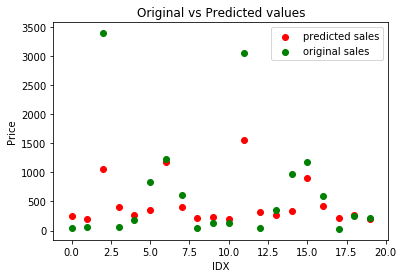

In [289]:
plt.scatter(idx[:20],pred[:20] ,label="predicted sales", color="red")
plt.scatter(idx[:20],tar[:20], label="original sales", color="green")
plt.legend()
plt.xlabel("IDX")
plt.ylabel("Price")
plt.title("Original vs Predicted values")
plt.show()
plt.show()

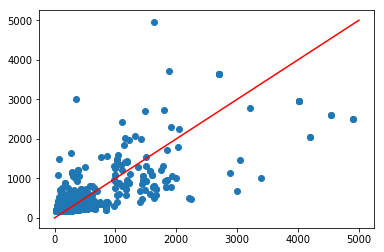

In [254]:
# from sklearn.linear_model import LinearRegression
# import pandas as pd
# import matplotlib.pyplot as plt

# def regression_report(regr):
#     print('Intercept: ', regr.intercept_)
#     print('Coefficients: ', regr.coef_)
#     print('R-squared: ',regr.score(x,y))
# # Convert torch to ndarray
# x = series_dl[0].numpy()
# y = series_dl[1].numpy()
# regr0 = LinearRegression().fit(x,y)
# regression_report(regr0)
# pred = np.round(regr0.predict(x),2)

x_list = []
y_list = []
for idx,i in enumerate(pred):
    x_list.append(i[0])
    y_list.append(tar[idx][0])
#     print(i[0], tar[idx][0])

x = np.linspace(0,5000,1000)
plt.plot(y_list, x_list,'o')
plt.plot(x, x, '-r')


Intercept:  [-3315.2322]
Coefficients:  [[-1.0494180e+03  6.2570511e+01  1.2652658e+01  9.5135844e-01
  -8.9339008e+02  1.5904553e+03 -2.7398438e+02  4.3733322e+02
  -1.0737913e+03 -2.9494955e+02  7.0890588e+02  4.9375180e+02
  -6.9433081e+02  1.6808638e+02 -1.6808627e+02  9.7420059e+01
  -9.7419952e+01 -1.2024354e+01  1.2023941e+01  0.0000000e+00]]
R-squared:  0.747433295929061


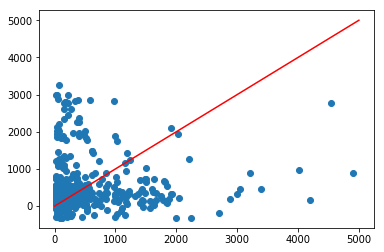

In [277]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

def regression_report(regr):
    print('Intercept: ', regr.intercept_)
    print('Coefficients: ', regr.coef_)
    print('R-squared: ',regr.score(x,y))
# Convert torch to ndarray
x = series_dl[0].numpy()
y = series_dl[1].numpy()
regr0 = LinearRegression().fit(x,y)
regression_report(regr0)
pred = np.round(regr0.predict(x),2)

x_list = []
y_list = []
for idx,i in enumerate(pred):
    x_list.append(i[0])
    y_list.append(tar[idx][0])
#     print(i[0], tar[idx][0])

x = np.linspace(0,5000,1000)
plt.plot(y_list, x_list,'o')
plt.plot(x, x, '-r')


#### By repeatedly splitting, training, and testing, you can create a realistic simulation of prediction accuracy.

In [278]:
for _ in range (4):
    train_X, test_X, train_y, test_y = ( train_test_split(df_hist.drop("Sales", axis=1), df_hist["Sales"], test_size=0.25))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pandas.Series(actuals)
experiments["Predictions"] = list(map(pandas.Series, experiments["Predictions"]))
# # trainDataSet
from torch.utils.data import *
# Define dataset
train_ds = TensorDataset(trainingTensor, targetTensor)
train_ds[0:3]

NameError: name 'train_test_split' is not defined

In [ ]:
df_superbowl_original = pandas.read_excel("super_bowl_promotion_data.xlsx")
df_superbowl = get_dummies(df_superbowl_original, 
                           prefix={k:"dmy_%s"%k for k in categorical_columns},
                           columns = list(categorical_columns))
assert "Sales" not in df_superbowl.columns 
assert {"Sales"}.union(df_superbowl.columns).issubset(set(df_hist.columns))
len(df_superbowl)

Note that the current data table might have less categorical range than the historical data. 

In [ ]:
for fld in set(df_hist.columns).difference(df_superbowl.columns, {"Sales"}):
    assert fld.startswith("dmy_")
    df_superbowl[fld] = 0

**Take care!!** `sklearn` [has no concept of columns](https://github.com/scikit-learn/scikit-learn/issues/7242). We make sure that the `df_superbowl` columns are ordered consistently with the `df_hist` independent column sub-matrix.

In [ ]:
df_superbowl = df_superbowl[list(df_hist.drop("Sales", axis=1).columns)]
# print(df_superbowl)
testingTensor = torch.tensor(df_superbowl.values).float()
testingTensor

In [ ]:
predicted = model(testingTensor)
predicted

# Prediction in hand, we commence optimization!

### LaTeX summary of family of equations

$$
\begin{array}{ll}
\max & sales\\
s.t. & X_{b,p}\in\{0,1\}\quad\forall (b,p)\in Prod\\
     & \sum\left(X_{b,p}:{(b,p)\in Prod} \right)=1\quad\forall b\in Soda\\
     & \sum\left(X_{b,p}:{(b,p)\in Prod, p\neq p_o, T(b)=t} \right) \leq max_t\quad\forall t\\
     & sales = \sum\left(f_{b,p} X_{b,p}:{(b,p)\in Prod}\right)\\
     & revenue = \sum\left(f_{b,p}  p X_{b,p}:{(b,p)\in Prod} \right)\\
     & investment = \sum\left(\left(f_{b,p} - f_{b,p_o}\right)_+ p_o X_{b,p}:{(b,p)\in Prod} \right)\\
     & investment <= max_{investment}
\end{array}
$$

### Putting the optimization input set together

In [ ]:
forecast_sales = df_superbowl_original[["Product", "Cost Per Unit"]].copy()
forecast_sales["Sales"] = predicted
forecast_sales.set_index(['Product','Cost Per Unit'], inplace=True)

In [ ]:
soda_family = {'11 Down': 'Clear', 'AB Root Beer': 'Dark', 
               'Alpine Stream': 'Clear', 'Bright': 'Clear', 
               'Crisp Clear': 'Clear', 'DC Kola': 'Dark',
               'Koala Kola': 'Dark', 'Mr. Popper': 'Dark', 
               'Popsi Kola': 'Dark'}
family  = set(soda_family[j] for j in soda_family)
soda    = set(j for j in soda_family)
max_prom = {f:2 for f in family}
max_investment = 750

In [ ]:
product_prices = set(forecast_sales.index.values)
normal_price = {b:0 for b in soda}
for b,p in product_prices:
    normal_price[b] = max(normal_price[b],p)

Note that not all estimated discounts yield a boost in sales.

In [ ]:
meaningful_discounts = 0
for b,p in product_prices:
    if forecast_sales.Sales[b,p] > forecast_sales.Sales[b,normal_price[b]]:
        meaningful_discounts += 1
meaningful_discounts, len(forecast_sales) - len(soda)

### Building a MIP model

$$
\begin{array}{l}
X_{b,p}\in\{0,1\}\quad\forall (b,p)\in Prod\\
0 \leq sales\\
0 \leq revenue\\
0 \leq investment \leq max_{investment}
\end{array}
$$

In [ ]:
import gurobipy as gu
model = gu.Model()
select_price = model.addVars(product_prices,vtype=gu.GRB.BINARY,name='X')
sales        = model.addVar(name='sales')
revenue      = model.addVar(name='revenue')
investment   = model.addVar(ub=max_investment, name='investment')
gusum = gu.quicksum

$$ 
sales = \sum\left(f_{b,p} X_{b,p}:{(b,p)\in Prod}\right)\\
revenue = \sum\left(f_{b,p} p X_{b,p}:{(b,p)\in Prod} \right)\\
investment = \sum\left(\left(f_{b,p} - f_{b,p_o}\right)_+ p_o X_{b,p}:{(b,p)\in Prod} \right)
$$

In [ ]:
model.addConstr(sales == select_price.prod(forecast_sales.Sales), name='sales')
model.addConstr(revenue == gusum(forecast_sales.Sales[b,p] * p * 
                                 select_price[b,p] for b,p in product_prices), 
                name='revenue')
model.addConstr(investment == 
                gusum(max(0,forecast_sales.Sales[b,p] - 
                            forecast_sales.Sales[b,normal_price[b]]) *
                        normal_price[b] * select_price[b,p] 
                        for b,p in product_prices),
                name='investment')
model.update()

$$
\sum\left(X_{b,p}:{(b,p)\in Prod} \right)=1\quad\forall b\in Soda\\
\sum\left(X_{b,p}:{(b,p)\in Prod, p\neq p_o, T(b)=t} \right) \leq max_t
$$

In [ ]:
model.addConstrs((select_price.sum(b,'*') == 1 for b in soda), name='OnePrice')
model.addConstrs((gusum(select_price[b,p] for b,p in product_prices if 
                        soda_family[b] == f and p != normal_price[b] ) 
                  <= max_prom[f] for f in family),
                 name='MaxProm')
model.update()

### Optimize and results

In [ ]:
model.setObjective(sales, sense=gu.GRB.MAXIMIZE)
model.optimize()

In [ ]:
model.status == gu.GRB.OPTIMAL

### Only the paranoid survive
Carefully sanity check the solution.

In [ ]:
sales.X, revenue.X, investment.X

In [ ]:
price_selections = {"Product":[], "Price":[], "Is Discount":[], "Family":[]}
for b, p in product_prices:
    if abs(select_price[b,p].X -1) < 0.0001: # i.e. almost one
        price_selections["Product"].append(b)
        price_selections["Price"].append(p)
        price_selections["Is Discount"].append(p < normal_price[b])
        price_selections["Family"].append(soda_family[b])
(DataFrame(price_selections).set_index("Product")
 [["Price", "Is Discount", "Family"]].sort_values("Family"))

#### Create a range of predictions to simulate the behavior of our solution under a range of conditions.

In [ ]:
simulated_KPI = {'Sales':[],'Revenue':[],'Investment':[]}
Z = select_price
num_infeas = 0
for i in range(100):
    np.random.seed(i)
    fitted = RandomForestRegressor(n_estimators=100,
                                   n_jobs=4).fit(y=df_hist["Sales"],
                                                 X=df_hist.drop("Sales", axis=1))
    forecast = df_superbowl_original[['Product', 'Cost Per Unit']].copy()
    forecast["Sales"] = fitted.predict(df_superbowl)
    forecast = forecast.set_index(['Product','Cost Per Unit'])
    sales, revenue, investment = 0, 0, 0
    for b,p in product_prices:
        sales   += forecast.Sales[b,p] * Z[b,p].X
        revenue += forecast.Sales[b,p] * p * Z[b,p].X
        investment += (max(0,forecast.Sales[b,p] - 
                             forecast.Sales[b,normal_price[b]]) * 
                       normal_price[b] * Z[b,p].X)
    if investment > max_investment:
        num_infeas += 1
    simulated_KPI['Sales'].append(sales)
    simulated_KPI['Revenue'].append(revenue)
    simulated_KPI['Investment'].append(investment)

In [ ]:
data = {'Sales','Revenue','Investment'}
color=iter(cm.rainbow(np.linspace(0,1,3)))
for t in data:
    plt.figure(figsize=(7,4),dpi=300)
    plt.hist(simulated_KPI[t],50,normed=1,color=next(color), alpha=0.75)
    plt.ylabel('Probability')
    plt.xlabel(t)
    plt.grid(True)
    plt.show()

In [ ]:
num_infeas

## Thank you for joining us
 * If you haven't already done so, please register at http://www.gurobi.com/ and then visit http://www.gurobi.com/downloads/get-anaconda to try Gurobi and Python for yourself.
 * Explore ticdat at https://pypi.python.org/pypi/ticdat/ and see the Opalytics Cloud Platform in action at http://bit.ly/2sjEuZt. 
 * For questions about Gurobi Pricing contact sales@gurobi.com or sales@gurobi.de.
 * A recording of the webinar, including the slides, will be available in roughly one week.

# Some extra references for Stochastic, Robust, and Risk optimization

After the webinar we received a lot of requests for further material on this topic. The following list is an (incomplete) list of sources for these topics, but a good starting point for it.

## Books

<ul>
    <li>Stochastic Programming, Peter Kall, Stein W. Walace, 1994</li>
    <li>Optimization Methods in Finance, Gerard Cornuejols and Reha T&uuml;t&uuml;nc&uuml;, 2006</li>
    <li>Lectures on Stochastic Programming: Modeling and Theory, Alexander Shapiro, Darinka Dentcheva, Andrzej Ruszczy&nacute;ski, 2009</li>
    <li>Robust Optimization, Aharon Ben-Tal, Laurent El Ghaoui, Arkadi Nemirovski, 2009</li>
    <li>Introduction to Stochastic Programming, John Birge, Fran&ccedil;ois Louveaux, 2011</li>
    <li>Modeling with Stochastic Programming, Alan J. King, Stein W. Walace, 2012</li>
</ul>

## Some papers

<ul>
    <li>Optimization of Conditional Value-at-Risk, R. Tyrrell Rockafellar, Stanislav Uryasev, 2000</li>
    <li>Supplier-Retailer Flexible Commitments Contracts: A Robust Optimization Approach, Aharon Ben Tal , Boaz Golany, Arcadi Nemirovskiy, Jean-Philippe Vial, 2003</li>
    <li>Tractable Approximations to Robust Conic Optimization Problems,Dimitris Bertsimas, Melvyn Sim, 2006</li>
    <li>Modeling and optimization of risk, Pavlo Krokhmal, Michael Zabarankin,Stan Uryasev, 2011</li>
</ul>

## Other resources

The stochastic optimization society in their <a href="www.stoprog.org">web site</a> has several tutorials and further links.

### Special Thanks

I would like to specially thank (in alphabetic order) to
<a href="http://www2.isye.gatech.edu/people/faculty/Shabbir_Ahmed/">Shabbir Ahmed</a>, Georgia Tech, 
<a href="http://www.uai.cl/academicos/cuerpo-academico/tito-homem-de-mello">Tito Homem-de-mello</a>, Universidad Adolfo Iba&ntilde;ez, 
<a href="https://directory.engr.wisc.edu/ie/faculty/luedtke_james">Jim Luedtke</a>, University of Wisconsin-Madison,
<a href="http://www.mccormick.northwestern.edu/research-faculty/directory/profiles/morton-david.html">David Morton</a>,  Northwestern University, and
<a href="http://bernardokp.uai.cl/">Bernardo Pagnoncelli</a>, Universidad Adolfo Iba&ntilde;ez, for suggesting books, links and papers. Any omission or error is my fault.

Daniel Espinoza,<br>
Senior Developer,<br>
Gurobi Optimization Inc.
